In [67]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv") #, header=None, names=col_names)


In [69]:

print(pima.tail())
# print(pima.label)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


In [70]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin','BMI','DiabetesPedigreeFunction', 'Age']
X = pima[feature_cols] # Features
y = pima['Outcome'] # Target variable


In [71]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train[:10])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
762            9       89             62              0        0  22.5   
127            1      118             58             36       94  33.3   
564            0       91             80              0        0  32.4   
375           12      140             82             43      325  39.2   
663            9      145             80             46      130  37.9   
144            4      154             62             31      284  32.8   
268            0      102             52              0        0  25.1   
21             8       99             84              0        0  35.4   
609            1      111             62             13      182  24.0   
511            0      139             62             17      210  22.1   

     DiabetesPedigreeFunction  Age  
762                     0.142   33  
127                     0.261   23  
564                     0.601   27  
375                     0.528   58  


In [72]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

print(X_train[X_train.isnull().any(axis=1)])
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# # print(X_train[:10])
# le = LabelEncoder()
# # print(X_train['pedigree'])
# # X_train = le.fit_transform(X_train)
# X_train['pedigree'] = (X_train['pedigree'].astype(float))
# X_train['bp'] = (X_train['bp'].astype(float))
# X_train['bmi'] = le.fit_transform(X_train['bmi'])
# X_train['insulin'] = le.fit_transform(X_train['insulin'])
# X_train['pregnant'] = le.fit_transform(X_train['pregnant'])
# # X_train['age'] = (X_train['age'].astype(float))
# X_train['glucose'] = le.fit_transform(X_train['glucose'])
# X_train['age'] = le.fit_transform(X_train['age'])
# # gluc = (X_train.loc[:,'glucose'])
# # print(type(gluc))
# # print(gluc)
# # print(float(gluc))
# # X_train['glucose'] = (X_train['glucose'].str.strip().astype(float))

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
Index: []


C:\Users\ShankararamaR\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


[[119  11]
 [ 26  36]]


In [75]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Text(0.5, 257.44, 'Predicted label')

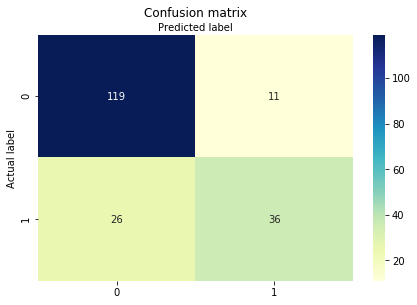

In [76]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

